In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from textblob import TextBlob
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Load dataset

In [4]:
df = pd.read_csv('disney_plus_titles.csv')

### Create a synthetic date column for demonstration

In [5]:
df['date_added'] = pd.date_range(start='2020-01-01', periods=len(df), freq='D')

### Set the date as the index

In [6]:
df.set_index('date_added', inplace=True)

### Generate some time series data

In [7]:
df['title_count'] = np.random.poisson(lam=2, size=len(df))

### Plot the time series

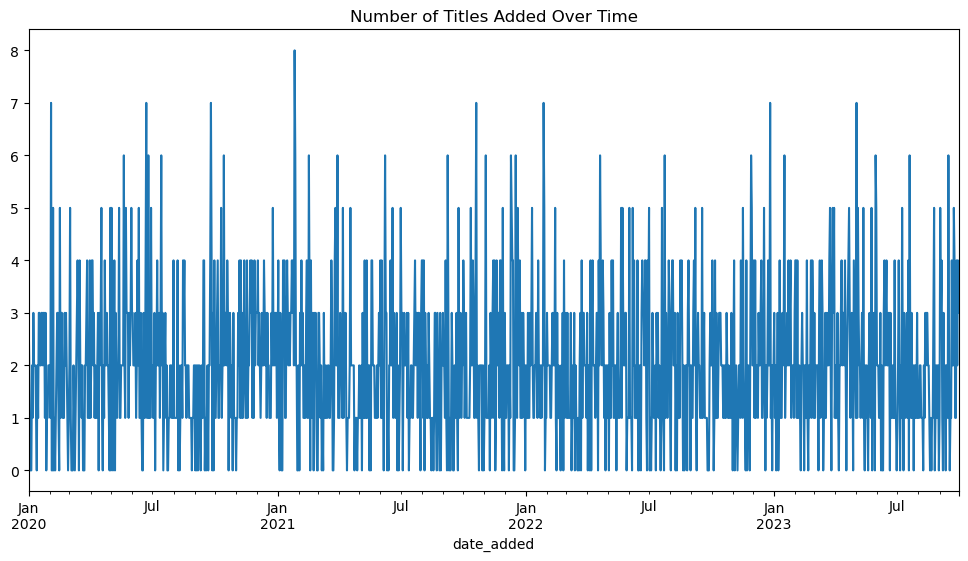

In [8]:
df['title_count'].plot(figsize=(12, 6))
plt.title('Number of Titles Added Over Time')
plt.show()

### Decompose the time series

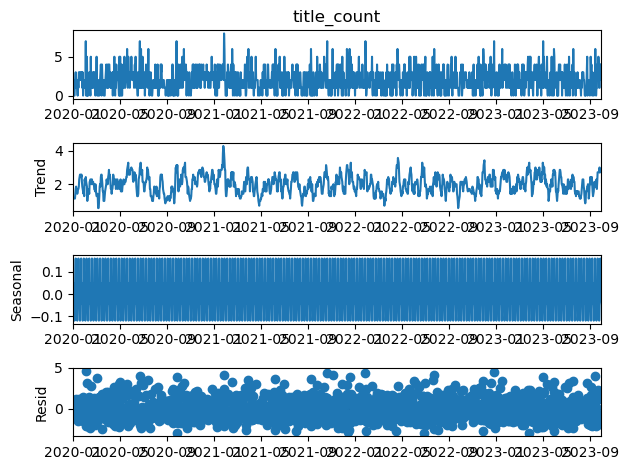

In [9]:
decomposition = seasonal_decompose(df['title_count'], model='additive')
decomposition.plot()
plt.show()

### Forecasting using Holt-Winters method

In [10]:
model = ExponentialSmoothing(df['title_count'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()
forecast = fit.forecast(12)

C:\Users\khage\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


### Plot the forecast

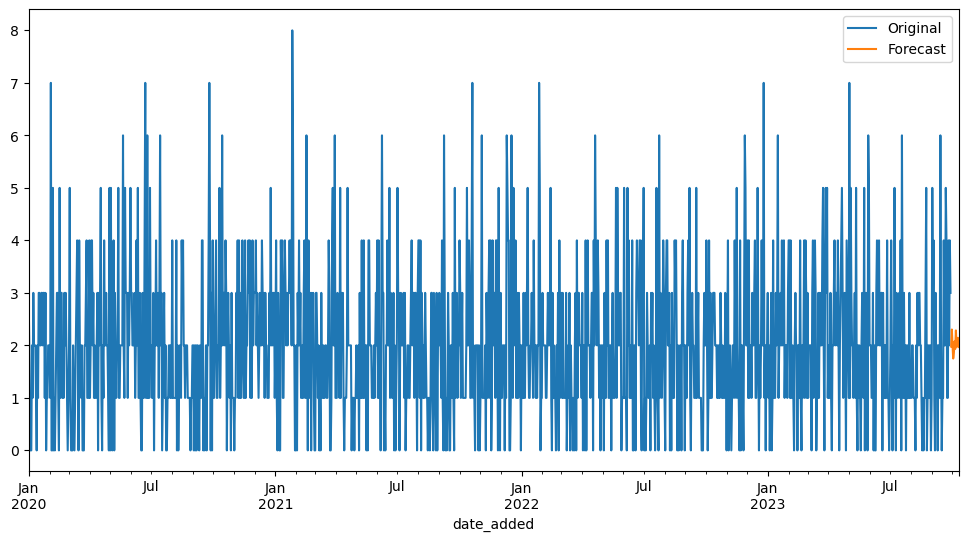

In [11]:
df['title_count'].plot(figsize=(12, 6), label='Original')
forecast.plot(label='Forecast')
plt.legend()
plt.show()

### Perform sentiment analysis on titles

In [12]:
df['title_sentiment'] = df['title'].apply(lambda x: TextBlob(x).sentiment.polarity)

### Display sentiment distribution

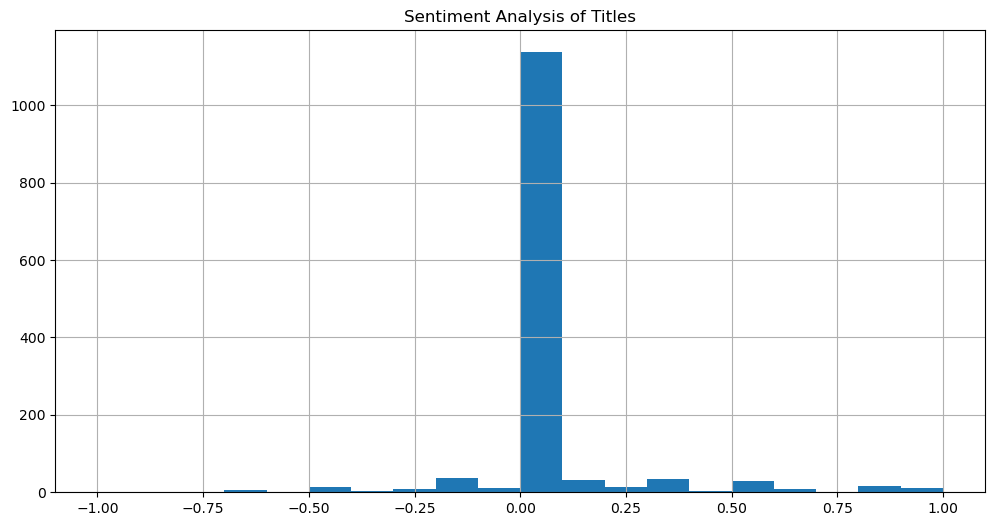

In [13]:
df['title_sentiment'].hist(bins=20, figsize=(12, 6))
plt.title('Sentiment Analysis of Titles')
plt.show()

### Display sample titles with their sentiment

In [14]:
print(df[['title', 'title_sentiment']].head())

                                     title  title_sentiment
date_added                                                 
2020-01-01                   A Spark Story         0.000000
2020-01-02                  Spooky Buddies         0.000000
2020-01-03          The Fault in Our Stars         0.000000
2020-01-04                 Dog: Impossible        -0.666667
2020-01-05  Spidey And His Amazing Friends         0.600000


### Select relevant features for clustering

In [15]:
features = df[['title_sentiment']] 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### Apply KMeans clustering

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\khage\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Plot the clusters

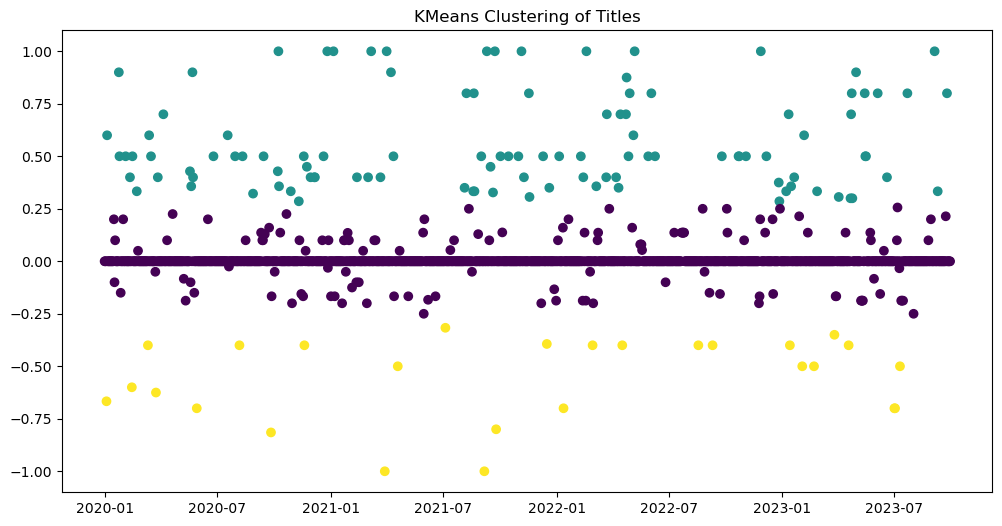

In [17]:
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['title_sentiment'], c=df['cluster'], cmap='viridis')
plt.title('KMeans Clustering of Titles')
plt.show()

### Display cluster centers

In [18]:
print('Cluster Centers:')
print(kmeans.cluster_centers_)

Cluster Centers:
[[-0.17476921]
 [ 2.76312172]
 [-3.07135965]]
